In [1]:
import json
import pickle

from enbios2.base.experiment import Experiment

In [2]:
exp: Experiment = pickle.load(open("exp.pkl", "rb"))
# Let's introspect the experiment 
print(exp.info())
print(json.dumps(exp.hierarchy_root.as_dict(remove_empty_childlist=True), indent=2))

Experiment: 
Activities: 6
  electricity production, wind, >3MW turbine, onshore - electricity production, wind, >3MW turbine, onshore
  electricity production, wind, 1-3MW turbine, onshore - electricity production, wind, 1-3MW turbine, onshore
  electricity production, wind, 1-3MW turbine, offshore - electricity production, wind, 1-3MW turbine, offshore
  electricity production, wind, <1MW turbine, onshore - electricity production, wind, <1MW turbine, onshore
  electricity production, solar tower power plant, 20 MW - electricity production, solar tower power plant, 20 MW
  electricity production, solar thermal parabolic trough, 50 MW - electricity production, solar thermal parabolic trough, 50 MW
Methods: 5
 ('Cumulative Energy Demand (CED)', 'energy resources: renewable', 'energy content (HHV)')
 ('EDIP 2003 no LT', 'non-renewable resources no LT', 'tantalum no LT')
 ('Ecological Scarcity 2021 no LT', 'waste disposal no LT', 'radioactive waste to deposit no LT')
 ('EF v3.1 no LT', 'h

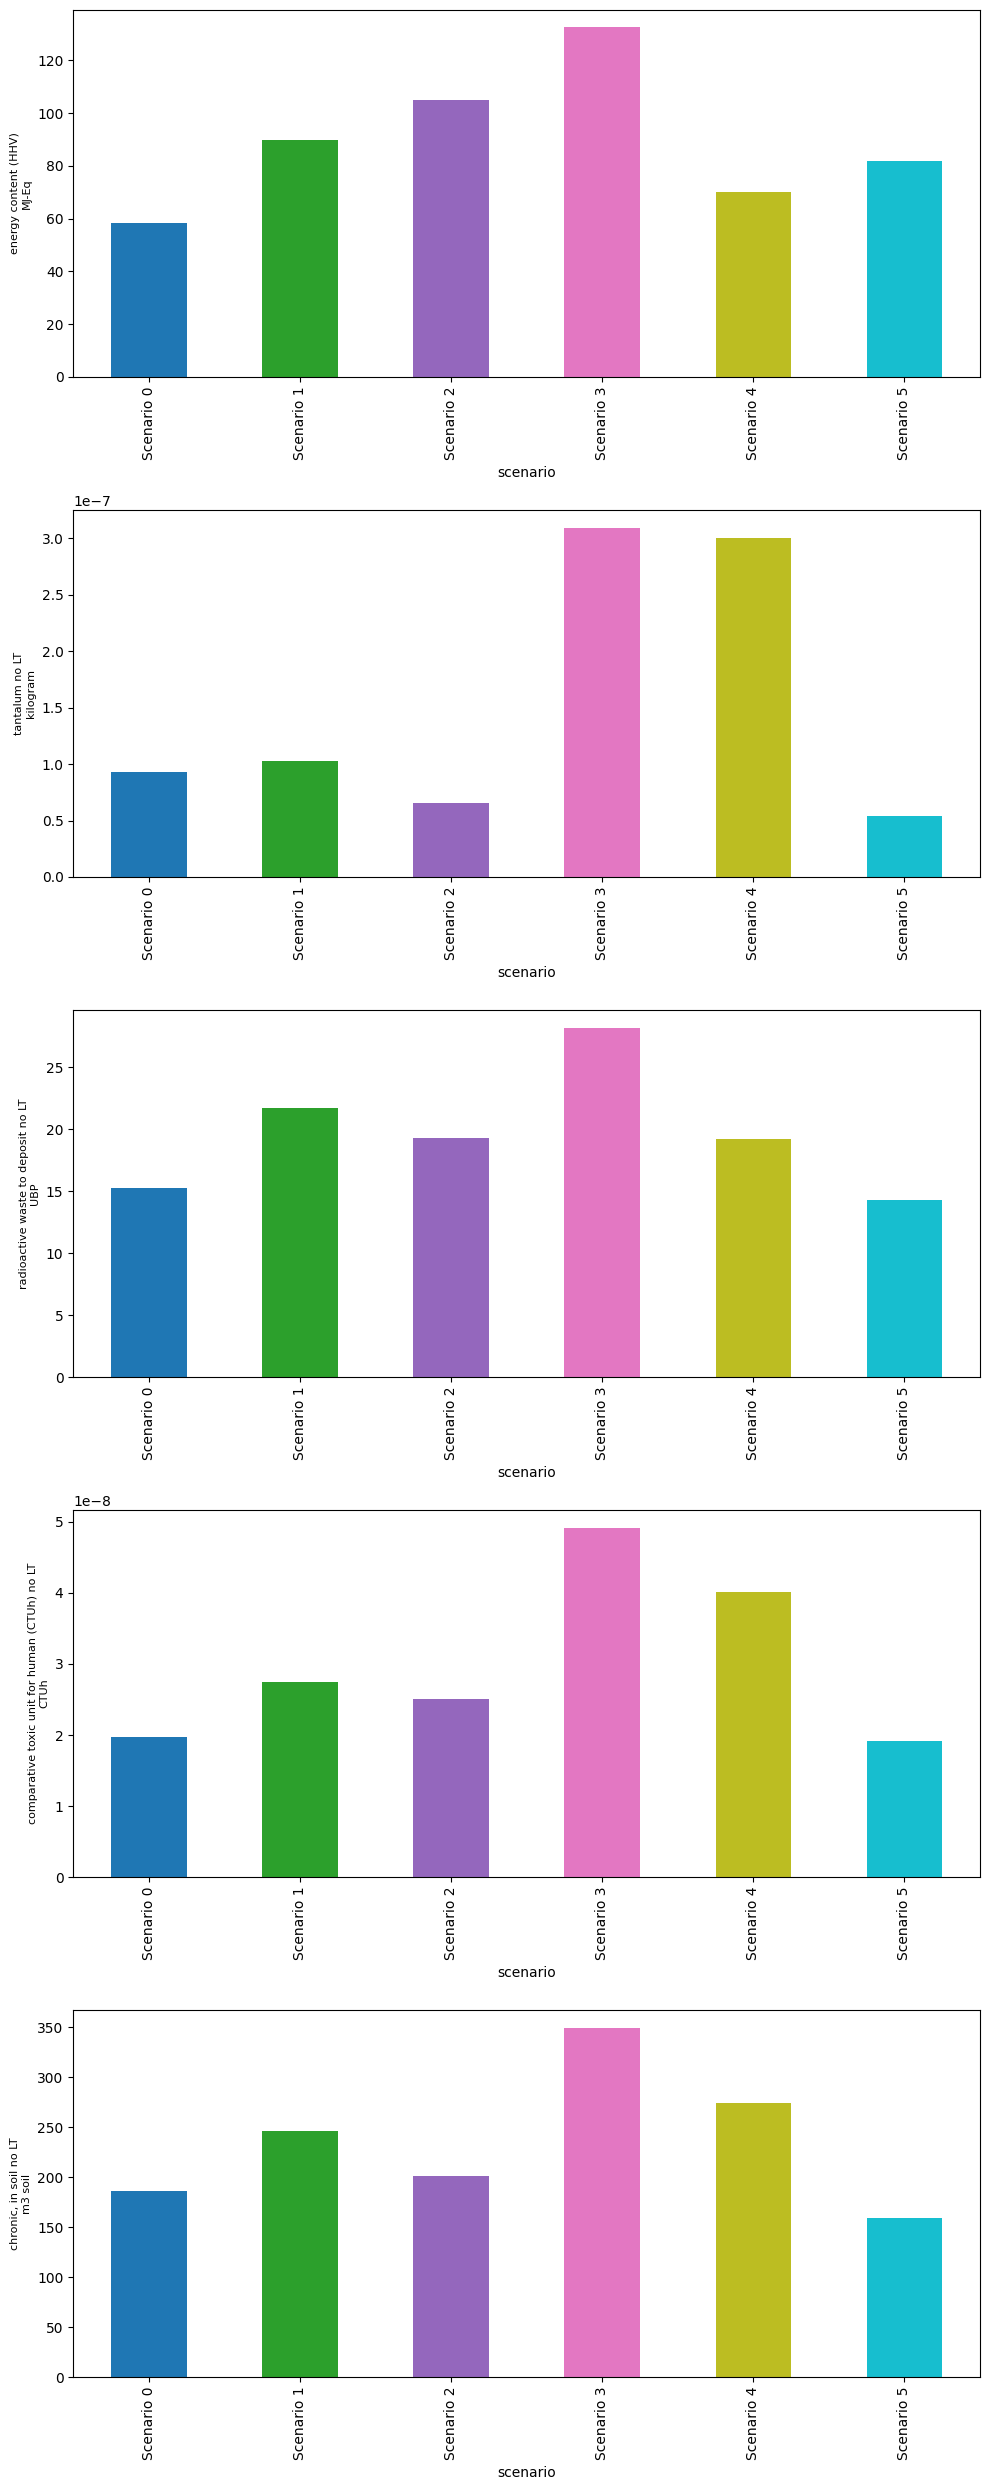

In [3]:
from enbios2.plotting.plot_experiment import bar_plot

bar_plot(exp);

In [ ]:
from enbios2.analyse.util import ResultsSelector
rs = ResultsSelector(exp, exp.scenario_aliases[:2])

rs.complete_df

In [10]:
from enbios2.analyse.util import ResultsSelector
rs = ResultsSelector(exp, exp.scenario_aliases[:2])
rs.base_df
rs.normalized_df()

ValueError: could not convert string to float: 'Scenario 0'

In [ ]:
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler


def normalized_df(res: ResultsSelector, normalize_with_selected_scenarios: bool = True):
    used_df = res.complete_df if normalize_with_selected_scenarios else res.base_df
    scaler = MinMaxScaler()
    values = used_df[1:]
    print(values)
    normalized_df = DataFrame()
    # copy the scenario column
    normalized_df['scenario'] = used_df['scenario']
    for value in values:
        normalized_df[value] = scaler.fit_transform(used_df[value].to_numpy().reshape(-1, 1))

    if normalize_with_selected_scenarios:
        # delete all rows where scenario is not in self.scenarios
        normalized_df = normalized_df[normalized_df['scenario'].isin(self.scenarios)]
    return normalized_df

rs = ResultsSelector(exp, exp.scenario_aliases[:2])
normalized_df(rs)

These are a lot of plots. Let's just plot the first two methods. For the most plotting functions we can pass two lists, one for the scenarios and one for the methods. All items of these lists must be aliases of the corresponding collection. We can these aliases with `Experiment.scenario_aliases` and  `Experiment.method_aliases`  

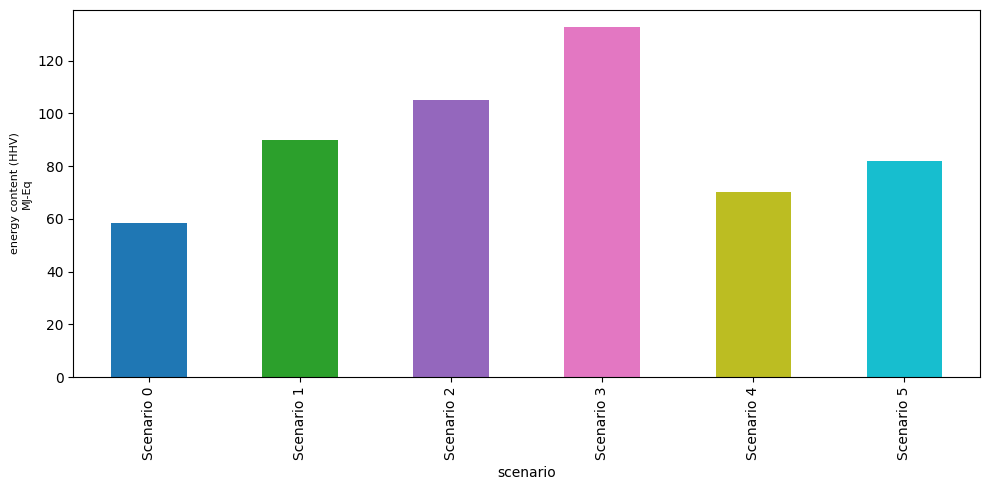

In [4]:
# just plot the first method
bar_plot(exp, methods=exp.method_aliases[:1]);

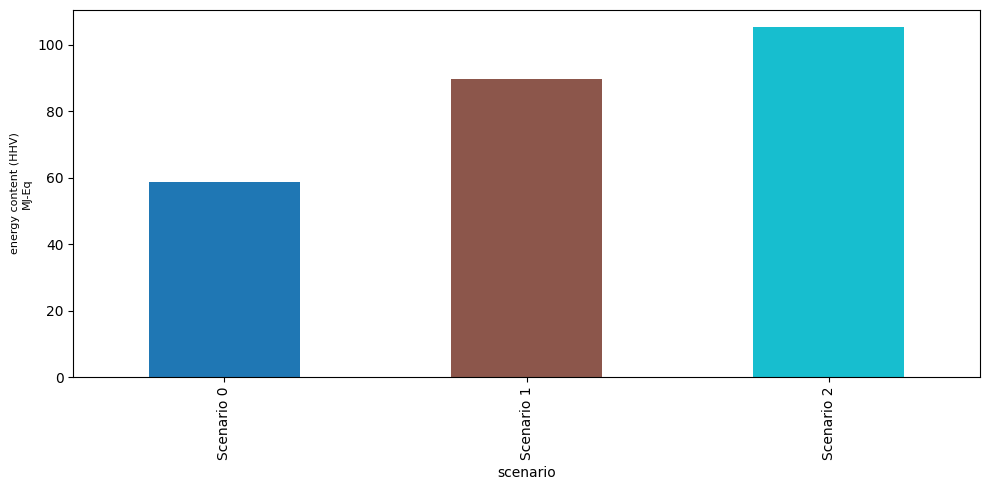

In [5]:
# just plot the first three scenarios for the first method.
bar_plot(exp, scenarios=exp.scenario_aliases[:3], methods=exp.method_aliases[:1]);

Next, we inspect the values of part of the hierarchy. We can do that with the 'stacked_bar_plot' method. Besides the selection of the scenarios and the methods, there are two ways to select which nodes in the hierarchy should be selected.
By default, it selects all nodes on `level = 1`, which are all nodes just below the root. By passing a `level` parameter, we can select another level.

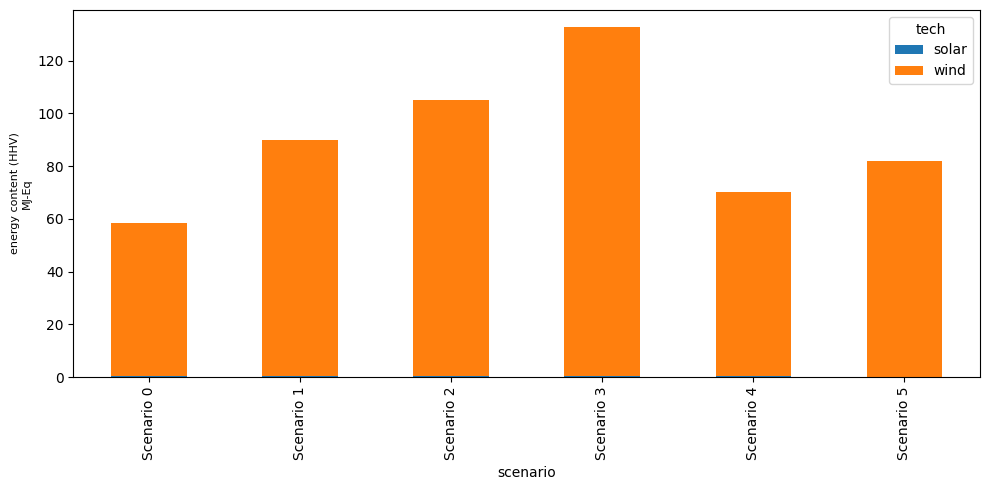

In [6]:
from enbios2.plotting.plot_experiment import stacked_bar_plot

stacked_bar_plot(exp, methods=exp.method_aliases[:1]);

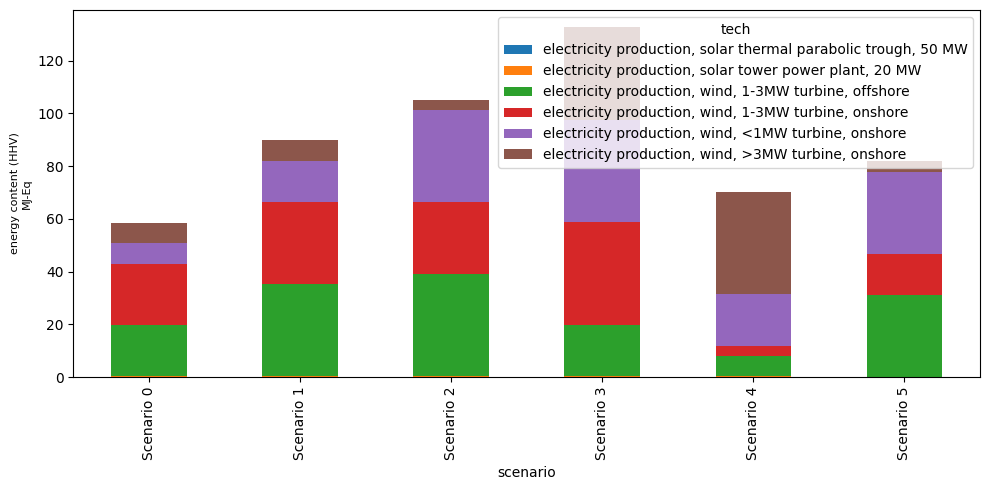

In [7]:
stacked_bar_plot(exp, methods=exp.method_aliases[:1], level=2);

['electricity production, wind, >3MW turbine, onshore', 'electricity production, wind, 1-3MW turbine, onshore', 'electricity production, wind, 1-3MW turbine, offshore', 'electricity production, wind, <1MW turbine, onshore', 'electricity production, solar tower power plant, 20 MW', 'electricity production, solar thermal parabolic trough, 50 MW']


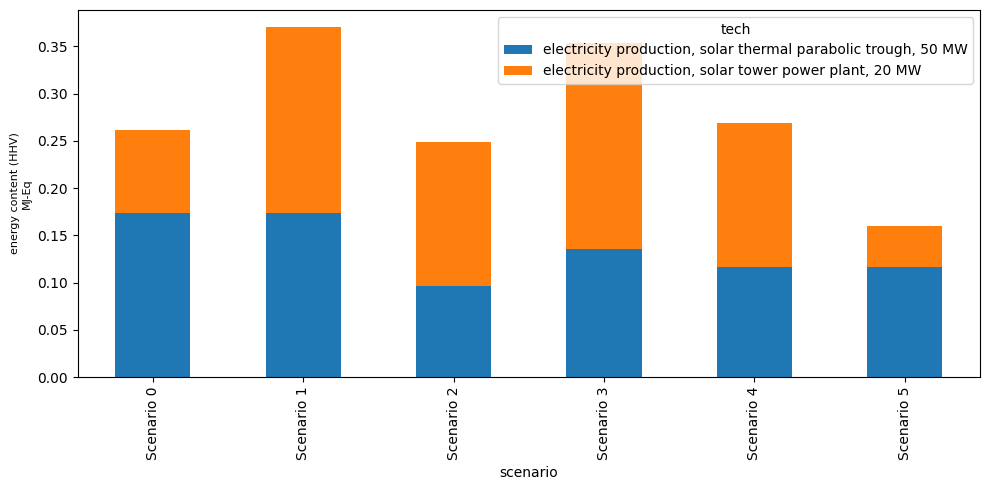

In [8]:
print(exp.activities_aliases)
stacked_bar_plot(exp,
                 methods=exp.method_aliases[:1],
                 aliases=['electricity production, solar tower power plant, 20 MW',
                          'electricity production, solar thermal parabolic trough, 50 MW']);

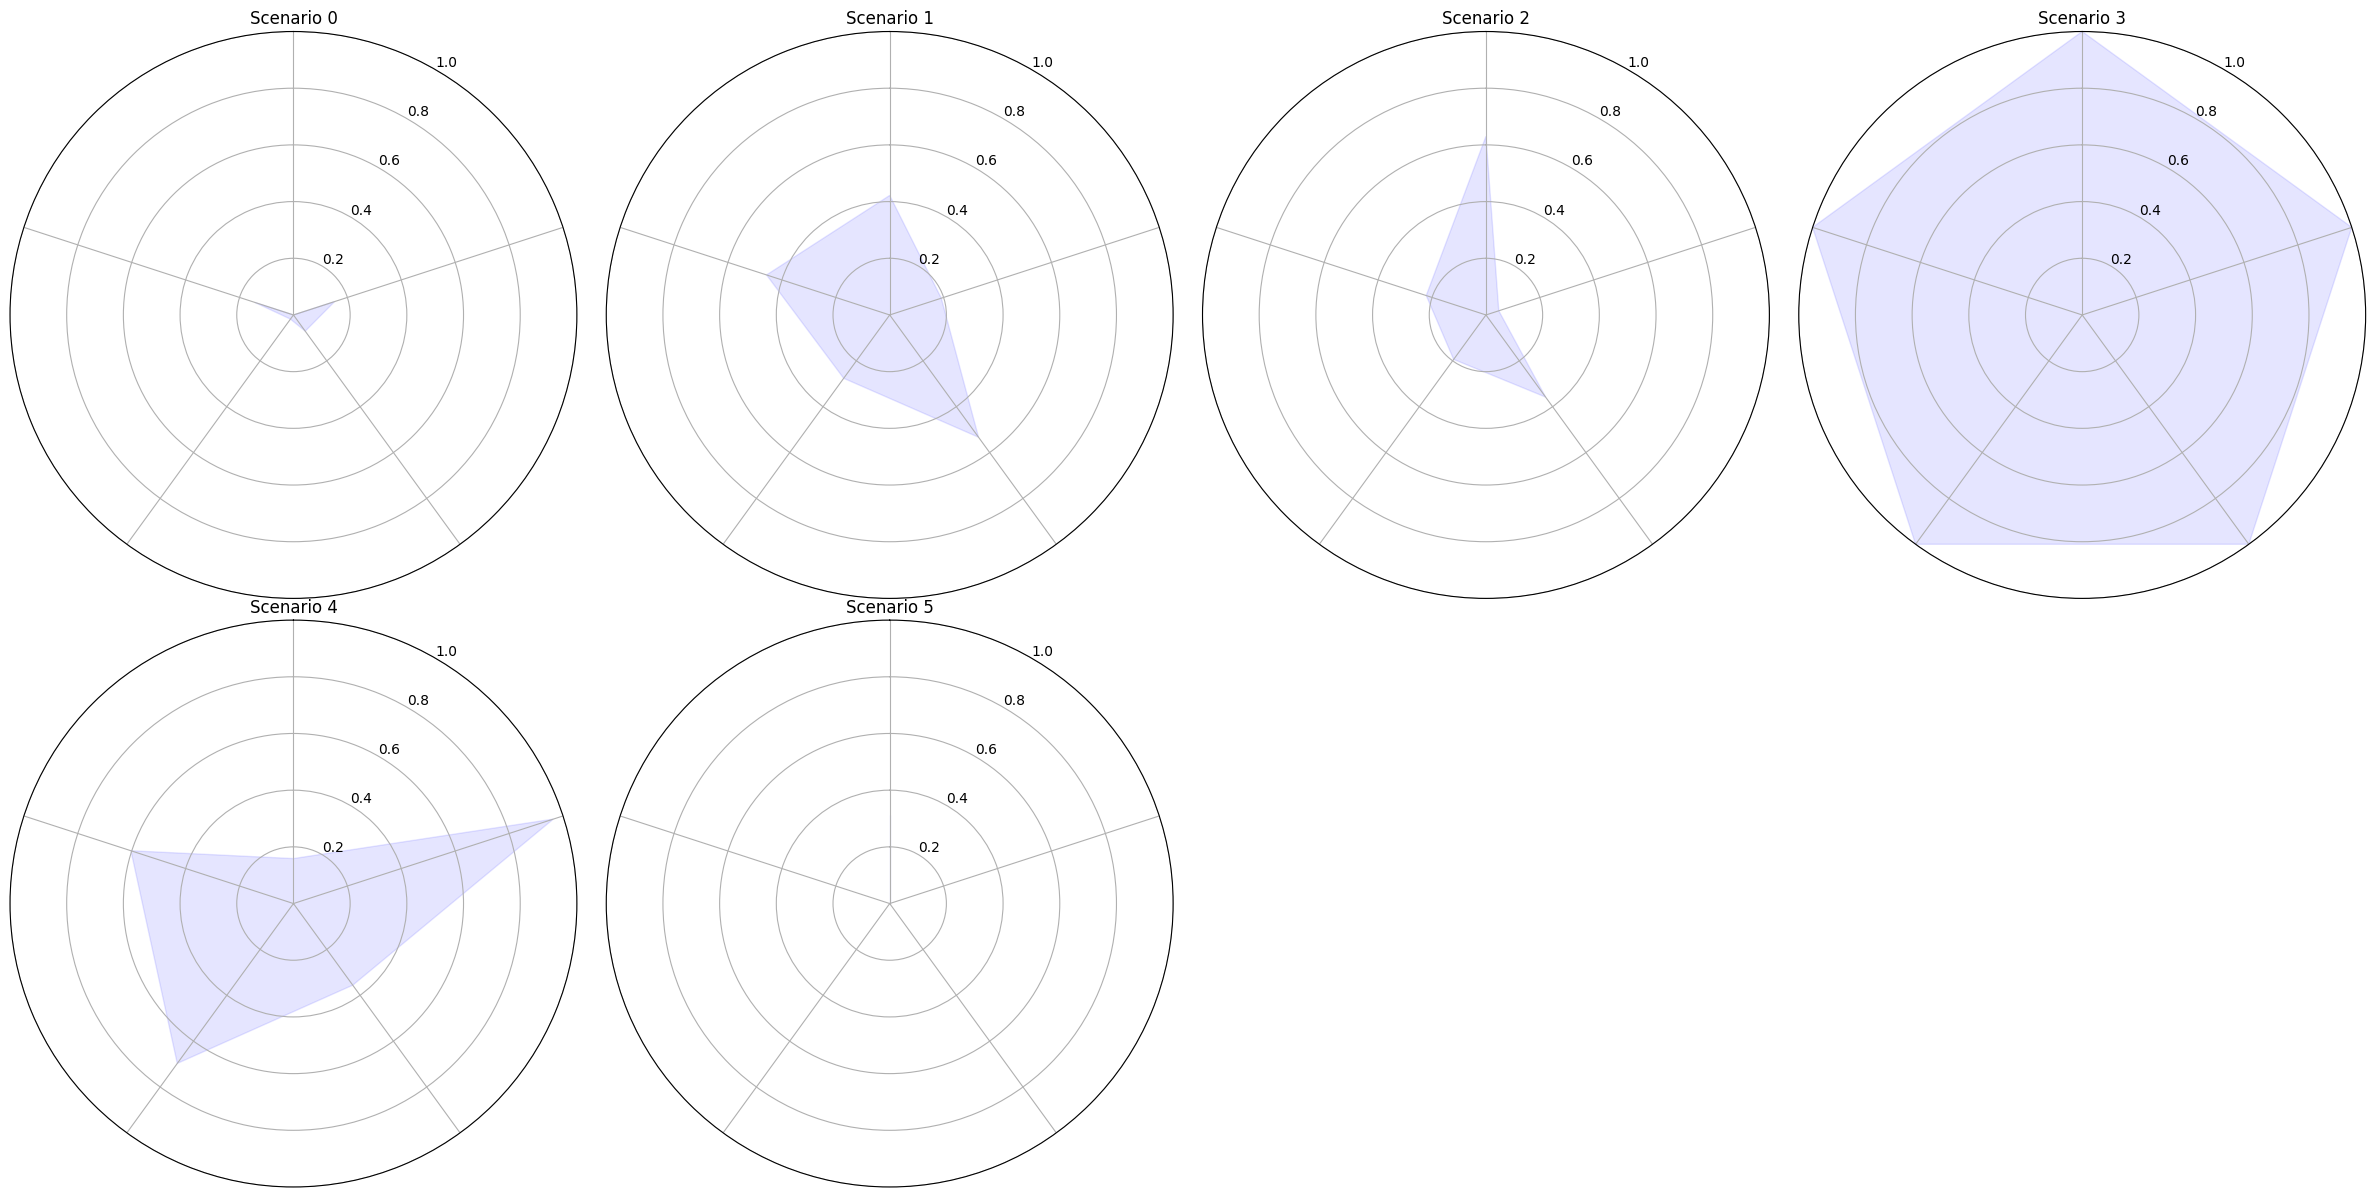

In [9]:
from enbios2.plotting.plot_experiment import star_plot

star_plot(exp);

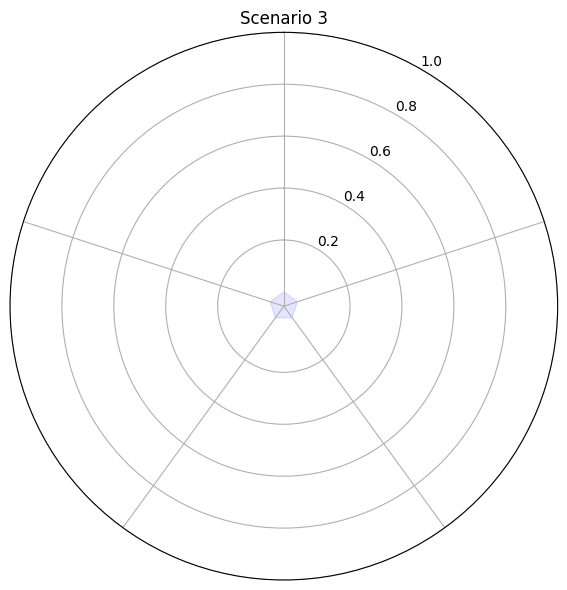

In [11]:
star_plot(exp, scenarios=[exp.scenario_aliases[3]]);

/home/ram/projects/enbios2/enbios2/plotting/plot_experiment.py:223: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


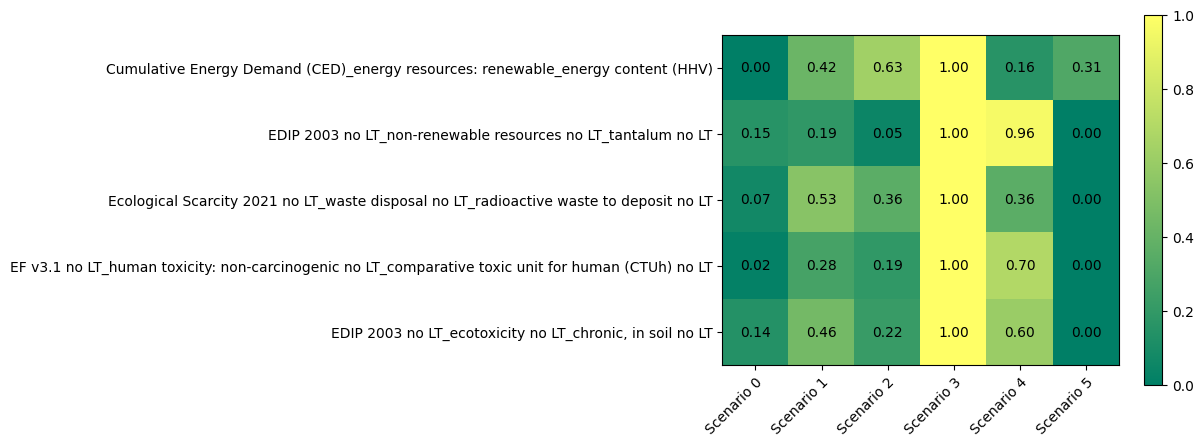

In [23]:
from enbios2.plotting.plot_experiment import plot_heatmap

plot_heatmap(exp);

In [ ]:
from enbios2.analyse.util import ResultsSelector
import numpy as np

rs = ResultsSelector.get_result_selector(exp)

df = rs.base_df
df = rs.compare_to_baseline(np.array(df.min()[1:]))
plot_heatmap(exp, special_df=df);

In [6]:
from enbios2.plotting.plot_experiment import plot_sankey

_ = plot_sankey(exp, "Scenario 1", exp.method_aliases[0], show=False, image_file="sankey.png")
_

index    scenario  \
0      0  Scenario 0   
1      1  Scenario 1   
2      2  Scenario 2   
3      3  Scenario 3   
4      4  Scenario 4   
5      5  Scenario 5   

   Cumulative Energy Demand (CED)_energy resources: renewable_energy content (HHV)  \
0                                           1.000000                                 
1                                           1.532722                                 
2                                           1.795987                                 
3                                           2.263196                                 
4                                           1.200400                                 
5                                           1.396372                                 

   EDIP 2003 no LT_non-renewable resources no LT_tantalum no LT  \
0                                           1.729504              
1                                           1.913032              
2                                           1.227390              
3                                           5.771820              
4                                           5.600181              
5                                           1.000000              

   Ecological Scarcity 2021 no LT_waste disposal no LT_radioactive waste to deposit no LT  \
0                                           1.069209                                        
1                                           1.522094                                        
2                                           1.350657                                        
3                                           1.978693                                        
4                                           1.348484                                        
5                                           1.000000                                        

   EF v3.1 no LT_human toxicity: non-carcinogenic no LT_comparative toxic unit for human (CTUh) no LT  \
0                                           1.028310                                                    
1                                           1.432066                                                    
2                                           1.303198                                                    
3                                           2.564106                                                    
4                                           2.090529                                                    
5                                           1.000000                                                    

   EDIP 2003 no LT_ecotoxicity no LT_chronic, in soil no LT  
0                                           1.173381         
1                                           1.549630         
2                                           1.266512         
3                                           2.203213         
4                                           1.725398         
5                                           1.000000